In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
df = pd.read_csv("data/estacion_22581_temt_2017.csv", header=None)

In [3]:
cols = ["numero","fecha","temt"]
df.columns = cols

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34941 entries, 0 to 34940
Data columns (total 3 columns):
numero    34941 non-null int64
fecha     34941 non-null object
temt      34876 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 819.0+ KB


In [5]:
df.tail()

,numero,fecha,temt
34936,22581,2017-12-30 23:00:00,9.3
34937,22581,2017-12-30 23:15:00,9.1
34938,22581,2017-12-30 23:30:00,8.9
34939,22581,2017-12-30 23:45:00,8.2
34940,22581,2017-12-31 00:00:00,7.6


In [6]:
df.index = df['fecha']

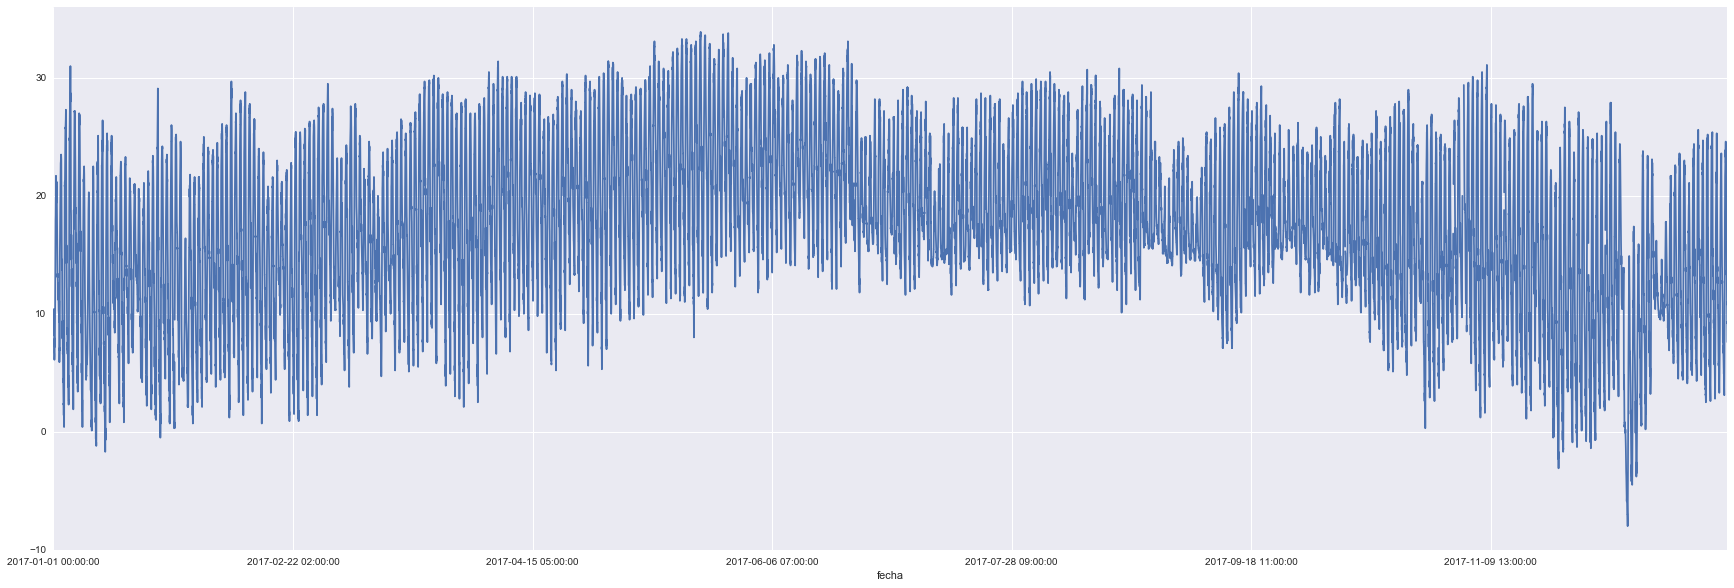

In [7]:
df['temt'].plot(figsize=(30,10))

In [8]:
# crear las columnas año, mes, día
def generarMes(f):
    anio,mes,dia = f.split(" ")[0].split("-")
    return mes

def generarDia(f):
    anio,mes,dia = f.split(" ")[0].split("-")
    return dia

df["año"] = pd.DatetimeIndex(df['fecha']).year

df["mes"] = df.apply(lambda x: generarMes(x['fecha']), axis=1)
df["dia"] = df.apply(lambda x: generarDia(x['fecha']), axis=1)

In [9]:
df.head()

,numero,fecha,temt,año,mes,dia
fecha,,,,,,
2017-01-01 00:00:00,22581,2017-01-01 00:00:00,9.1,2017,01,01
2017-01-01 00:15:00,22581,2017-01-01 00:15:00,9.6,2017,01,01
2017-01-01 00:30:00,22581,2017-01-01 00:30:00,9.4,2017,01,01
2017-01-01 00:45:00,22581,2017-01-01 00:45:00,9.4,2017,01,01
2017-01-01 01:00:00,22581,2017-01-01 01:00:00,9.5,2017,01,01


In [10]:
df['mes'] = pd.to_numeric(df['mes'], errors='coerce')
df['dia'] = pd.to_numeric(df['dia'], errors='coerce')

In [11]:
df.head()

,numero,fecha,temt,año,mes,dia
fecha,,,,,,
2017-01-01 00:00:00,22581,2017-01-01 00:00:00,9.1,2017,1,1
2017-01-01 00:15:00,22581,2017-01-01 00:15:00,9.6,2017,1,1
2017-01-01 00:30:00,22581,2017-01-01 00:30:00,9.4,2017,1,1
2017-01-01 00:45:00,22581,2017-01-01 00:45:00,9.4,2017,1,1
2017-01-01 01:00:00,22581,2017-01-01 01:00:00,9.5,2017,1,1


In [12]:
df_corte = df.loc[df['mes'] >= 6]

In [13]:
df_corte.head()

,numero,fecha,temt,año,mes,dia
fecha,,,,,,
2017-06-01 00:00:00,22581,2017-06-01 00:00:00,17.6,2017,6,1
2017-06-01 00:15:00,22581,2017-06-01 00:15:00,18.0,2017,6,1
2017-06-01 00:30:00,22581,2017-06-01 00:30:00,18.1,2017,6,1
2017-06-01 00:45:00,22581,2017-06-01 00:45:00,18.2,2017,6,1
2017-06-01 01:00:00,22581,2017-06-01 01:00:00,18.6,2017,6,1


/Users/jorgemauricio/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


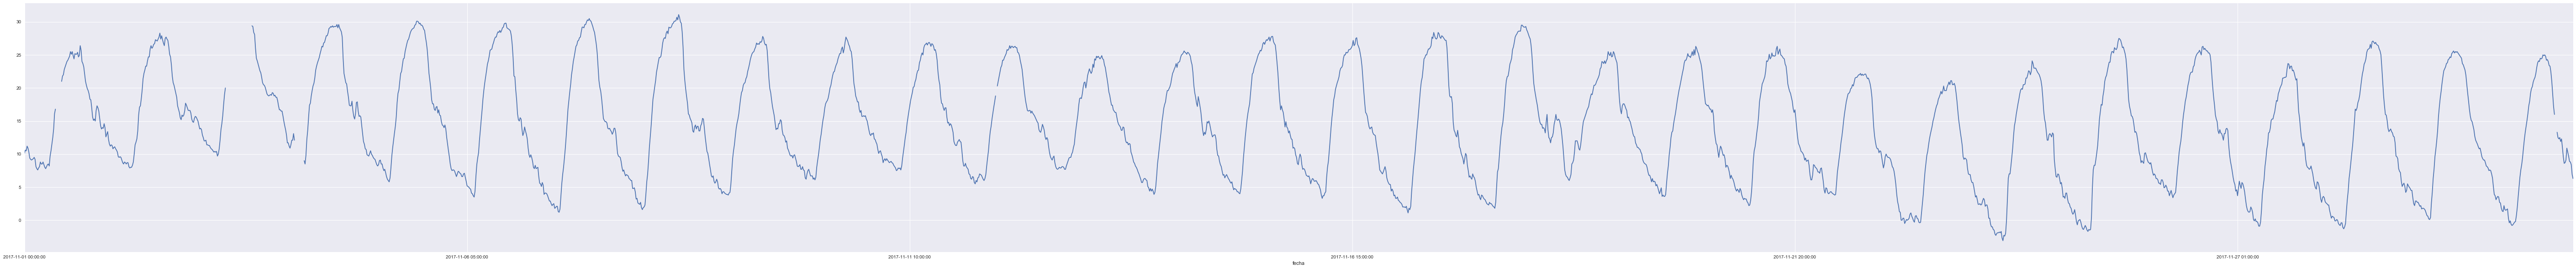

In [14]:
df_corte[df['mes'] == 11]['temt'].plot(figsize=(100,10))

In [15]:
df_corte[df['mes'] == 11]['temt'].to_csv('datos_mes_11.csv')

/Users/jorgemauricio/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [16]:
df_corte.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20449 entries, 2017-06-01 00:00:00 to 2017-12-31 00:00:00
Data columns (total 6 columns):
numero    20449 non-null int64
fecha     20449 non-null object
temt      20387 non-null float64
año       20449 non-null int64
mes       20449 non-null int64
dia       20449 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.1+ MB


In [17]:
diaria = df_corte.groupby(['mes','dia']).agg(['max', 'min'])['temt']

In [18]:
diaria

max   min
mes dia            
6   1    29.5  15.2
    2    31.3  15.3
    3    32.0  11.8
    4    31.5  14.6
    5    32.1  12.9
    6    32.8  13.5
    7    30.0  15.2
    8    30.2  15.5
    9    31.1  14.3
    10   28.1  14.1
    11   31.9  14.1
    12   32.3  18.1
    13   31.4  16.4
    14   30.3  13.8
    15   31.6  14.8
    16   31.8  13.1
    17   32.1  13.6
    18   31.1  14.6
    19   29.9  12.1
    20   28.9  12.1
    21   30.8  14.0
    22   33.1  16.0
    23   31.2  17.5
    24   29.8  15.3
    25   24.9  11.8
    26   25.0  15.9
    27   25.1  15.3
    28   28.2  15.9
    29   28.2  15.1
    30   27.2  12.8
...       ...   ...
12  2    25.3  -0.7
    3    25.1   2.0
    4    26.3   1.8
    5    27.9   2.7
    6    25.4   3.6
    7    24.4   3.0
    8    13.9  -3.5
    9    14.9  -8.0
    10   17.4  -4.5
    11   15.9  -3.8
    12   23.8   0.5
    13   23.4   0.2
    14   23.1   3.2
    15   16.2  10.3
    16   14.6   9.5
    17   17.8   9.4
    18   21.7   6.9
    19   22.6   5.8
    20   23.6   4.5
    21   23.0   4.4
    22   21.1   4.1
    23   24.4   4.8
    24   25.6   4.3
    25   24.7   4.8
    26   25.2   2.5
    27   25.4   2.6
    28   25.3   2.8
    29   23.6   3.3
    30   24.6   3.1
    31    7.6   7.6

[214 rows x 2 columns]

In [19]:
diaria.to_csv("diarios.csv")

In [20]:
df_diarios = pd.read_csv('diarios.csv')

In [21]:
df_diarios.head()

,mes,dia,max,min
0,6,1,29.5,15.2
1,6,2,31.3,15.3
2,6,3,32.0,11.8
3,6,4,31.5,14.6
4,6,5,32.1,12.9


In [22]:
df.head()

,numero,fecha,temt,año,mes,dia
fecha,,,,,,
2017-01-01 00:00:00,22581,2017-01-01 00:00:00,9.1,2017,1,1
2017-01-01 00:15:00,22581,2017-01-01 00:15:00,9.6,2017,1,1
2017-01-01 00:30:00,22581,2017-01-01 00:30:00,9.4,2017,1,1
2017-01-01 00:45:00,22581,2017-01-01 00:45:00,9.4,2017,1,1
2017-01-01 01:00:00,22581,2017-01-01 01:00:00,9.5,2017,1,1


In [23]:
# generar columnas de hora, minutos, segundos

def generarHora(f):
    hora,minuto,segundo = f.split(" ")[1].split(":")
    return hora

def generarMinuto(f):
    hora,minuto,segundo = f.split(" ")[1].split(":")
    return minuto

In [24]:
df["hora"] = df.apply(lambda x: generarHora(x['fecha']), axis=1)
df["minuto"] = df.apply(lambda x: generarMinuto(x['fecha']), axis=1)

In [25]:
df.head()

,numero,fecha,temt,año,mes,dia,hora,minuto
fecha,,,,,,,,
2017-01-01 00:00:00,22581,2017-01-01 00:00:00,9.1,2017,1,1,00,00
2017-01-01 00:15:00,22581,2017-01-01 00:15:00,9.6,2017,1,1,00,15
2017-01-01 00:30:00,22581,2017-01-01 00:30:00,9.4,2017,1,1,00,30
2017-01-01 00:45:00,22581,2017-01-01 00:45:00,9.4,2017,1,1,00,45
2017-01-01 01:00:00,22581,2017-01-01 01:00:00,9.5,2017,1,1,01,00


In [26]:
# datos mes 11

In [27]:
df['hora'] = pd.to_numeric(df['hora'], errors='coerce')

In [28]:
mensuales = df[df['mes']==11].groupby(["mes","dia",'hora']).mean()['temt']

In [29]:
mensuales.to_csv('mensuales.csv')
mensuales = pd.read_csv('mensuales.csv', header=None, index_col=False)
cols = ['mes','dia','hora','temt']
mensuales.columns = cols

In [30]:
mensuales.head()

,mes,dia,hora,temt
0,11,1,0,10.600
1,11,1,1,9.950
2,11,1,2,9.275
3,11,1,3,8.175
4,11,1,4,8.325


x1:  0.00149061928224
x2:  -0.0850713186657
x3:  1.47041242492
x4:  -7.12039427514
constante:  12.2513180375
dias descartados 8
correlación: 0.5973105431021614 día: [6]



x1:  0.000947296966319
x2:  -0.0579237492915
x3:  1.0557730278
x4:  -5.24328189691
constante:  12.9529024217


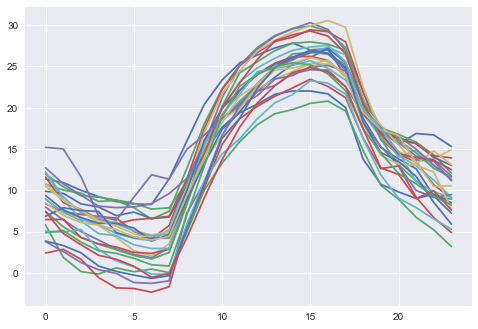

In [50]:
# graficar cada uno de los días del mes 11
x1 = []
x2 = []
x3 = []
x4 = []
constante = []
dias_descartados = []
correlacion = []
dia_max = 0
for dia in range(1,31):
    df_temp = mensuales.loc[(mensuales["dia"] == dia)]
    df_temp.head()
    X = np.array(df_temp['hora'])
    y = np.array(df_temp['temt'])
    if np.isnan(y.min()):
        dias_descartados.append(dia)
    else:
        plt.plot(X,y)
        z = np.polyfit(X, y, 4)
        x1.append(z[0])
        x2.append(z[1])
        x3.append(z[2])
        x4.append(z[3])
        constante.append(z[4])
        corre = np.corrcoef(X,y)[0,1]
        correlacion.append(corre)

print("x1: ",np.mean(x1))
print("x2: ",np.mean(x2))
print("x3: ",np.mean(x3))
print("x4: ",np.mean(x4))
print("constante: ",np.mean(constante))
print("dias descartados", np.sum(dias_descartados))
corre_max = np.max(correlacion)
print("correlación: {} día: {}".format(corre_max,np.where(correlacion == corre_max)[0]))

# día 7
print("\n\n")
print("x1: ",x1[6])
print("x2: ",x2[6])
print("x3: ",x3[6])
print("x4: ",x4[6])
print("constante: ",constante[6])


In [33]:
import seaborn as sns

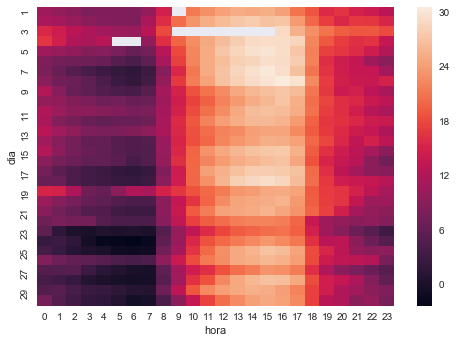

In [34]:
table = mensuales.pivot("dia", "hora", "temt")
sns.heatmap(table)

In [35]:
mensuales[mensuales['temt'].isnull()]

,mes,dia,hora,temt
9,11,1,9,NaN
57,11,3,9,NaN
58,11,3,10,NaN
59,11,3,11,NaN
60,11,3,12,NaN
61,11,3,13,NaN
62,11,3,14,NaN
63,11,3,15,NaN
77,11,4,5,NaN
78,11,4,6,NaN


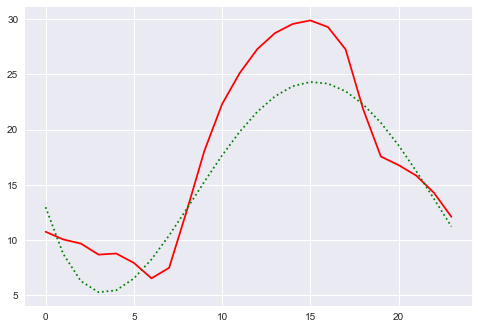

In [52]:
# datos día 3
df_temp3 = mensuales.loc[(mensuales["dia"] == 5)]
df_temp3.head()
X = np.array(df_temp3['hora'])
y = np.array(df_temp3['temt'])
df_temp3

# datos coeficientes
#x1:  0.000947296966319
#x2:  -0.0579237492915
#x3:  1.0557730278
#x4:  -5.24328189691
#constante:  12.9529024217

def generarPoly(x):
    x1 = 0.000947296966319
    x2 = -0.0579237492915
    x3 = 1.0557730278
    x4 = -5.24328189691
    coff = 12.9529024217
    
    return x1*x**4+x2*x**3+x3*x**2+x4*x**1+coff

y_pred = generarPoly(X)

plt.plot(X,y,'r-',X,y_pred,"g:")

In [ ]:
x1 = []
x2 = []
x3 = []
x4 = []
constante = []
for dia in range(1,31):
    df_temp = mensuales.loc[(mensuales["dia"] == dia) & (mensuales['hora'] >= 7) & (mensuales['hora'] <= 16)]
    df_temp.head()
    X = np.array(df_temp['hora'])
    y = np.array(df_temp['temt'])
    plt.plot(X,y)
    z = np.polyfit(np.log(X), y, 1)
    x1.append(z[0])
    x2.append(z[1])
    #x3.append(z[2])
    #x4.append(z[3])
    #constante.append(z[4])

print("x1: ",np.mean(x1))
print("x2: ",np.mean(x2))
# print("x3: ",np.mean(x3))
# print("x4: ",np.mean(x4))
#print("constante: ",np.mean(constante))

In [ ]:
# datos día 3
import math
df_temp4 = mensuales.loc[(mensuales["dia"] == 10) & (mensuales['hora'] >= 7) & (mensuales['hora'] <= 16)]

X = np.array(df_temp4['hora'])
y = np.array(df_temp4['temt'])

# datos coeficientes
# x1:  25.3118265417
# x2:  -42.1749266355

x1 =  25.3118265417
x2 =  -42.1749266355

# y = ln(a) + b(ln(x))

#y_pred = (98173288097.2 * X) ** -42.17 

y_pred = -np.log(x1) + x2 * -np.log(X) - 80

print(y_pred)

plt.plot(X,y,'r-',X,y_pred,"b--")

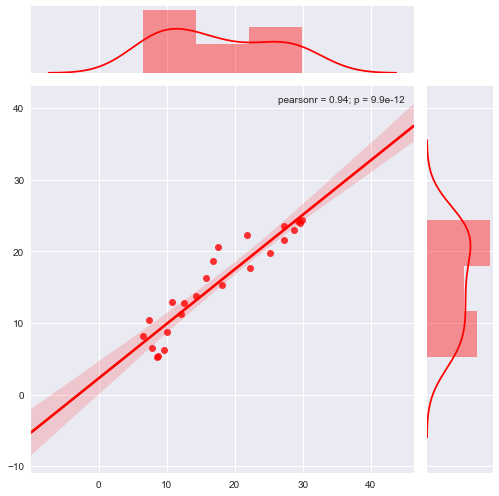

In [54]:
# gráfica de regresión
X = np.array(df_temp3['hora'])
y = np.array(df_temp3['temt'])

# datos coeficientes
#x1:  0.000947296966319
#x2:  -0.0579237492915
#x3:  1.0557730278
#x4:  -5.24328189691
#constante:  12.9529024217

def generarPoly(x):
    x1 = 0.000947296966319
    x2 = -0.0579237492915
    x3 = 1.0557730278
    x4 = -5.24328189691
    coff = 12.9529024217
    
    return x1*x**4+x2*x**3+x3*x**2+x4*x**1+coff

y_pred = generarPoly(X)

g = sns.jointplot(y,y_pred, kind="reg", color="r", size=7)